In [1]:
# 导入相关模块
import torch
from torch.utils.data import TensorDataset  # 构造数据集对象
from torch.utils.data import DataLoader  # 数据加载器
from torch import nn  # nn模块中有平方损失函数和假设函数
from torch import optim  # optim模块中有优化器函数
from sklearn.datasets import make_regression  # 创建线性回归模型数据集
import matplotlib.pyplot as plt  # 可视化

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'SimHei', 'Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 定义函数, 创建线性回归样本数据.
def create_dataset():
    # 1. 创建数据集对象.
    x, y, coef = make_regression(
        n_samples=100,  # 100条样本(100个样本点)
        n_features=1,  # 1个特征(1个特征点)
        noise=10,  # 噪声, 噪声越大, 样本点越散, 噪声越小, 样本点越集中
        coef=True,  # 是否返回系数, 默认为False, 返回值为None
        bias=14.5,  # 偏置
        random_state=3  # 随机种子, 随机种子相同, 输出数据相同
    )

    # 2. 把上述的数据, 封装成 张量对象.
    x = torch.tensor(x, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    # 3. 返回结果.
    return x, y, coef

In [3]:
    # 3.1 创建数据集.
    x, y, coef = create_dataset()
    #print(f'x: {x}, y: {y}, coef: {coef}')

# 1. 创建数据集对象. 把 tensor -> 数据集对象 -> 数据加载器.

In [4]:
 dataset = TensorDataset(x, y)

# 2. 创建数据加载器对象.

In [5]:
    # 参1: 数据集对象, 参2: 批次大小, 参3: 是否打乱数据(训练集打乱, 测试集不打乱)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 3. 创建初始的 线性回归模型.

In [6]:
# 参1: 输入特征维度, 参2: 输出特征维度.
model = nn.Linear(1, 1)

# 4. 创建损失函数对象.

In [7]:
criterion = nn.MSELoss()

# 5. 创建优化器对象.

In [8]:
    # 参1: 模型参数, 参2: 学习率.
    optimizer = optim.SGD(model.parameters(), lr=0.01)

# 6. 具体的训练过程.=

In [9]:
    # 6.1 定义变量, 分别表示: 训练轮数, 每轮的(平均)损失值, 训练总损失值, 训练的样本数.
    epochs, loss_list, total_loss, total_sample = 1000, [], 0.0, 0
    # 6.2 开始训练, 按轮训练.
    for epoch in range(epochs):  # epoch的值: 0, 1, 2...99
        # 6.3 每轮是分 批次 训练的, 所以从 数据加载器中 获取 批次数据.
        for train_x, train_y in dataloader:  # 7批(16, 16, 16, 16, 16, 16, 4)
            # 6.4 模型预测.
            y_pred = model(train_x)
            # 6.5 计算(每批的平均)损失值.
            loss = criterion(y_pred, train_y.reshape(-1, 1))  # -1 自动计算.
            # 6.6 计算总损失 和 样本(批次)数
            total_loss += loss.item()
            total_sample += 1
            # 6.7 梯度清零 + 反向传播 + 梯度更新.
            optimizer.zero_grad()  # 梯度清零
            loss.backward()  # 反向传播, 计算梯度
            optimizer.step()  # 梯度更新

        # 6.8 把本轮的(平均)损失值, 添加到列表中.
        loss_list.append(total_loss / total_sample)
        # print(f'轮数: {epoch + 1}, 平均损失值: {total_loss / total_sample}')


# 7. 打印(最终的)训练结果.

In [ ]:
    print(f'{epochs} 轮的平均损失分别为: {loss_list}')
    print(f'模型参数, 权重: {model.weight}, 偏置: {model.bias}')

# 8. 绘制损失曲线.

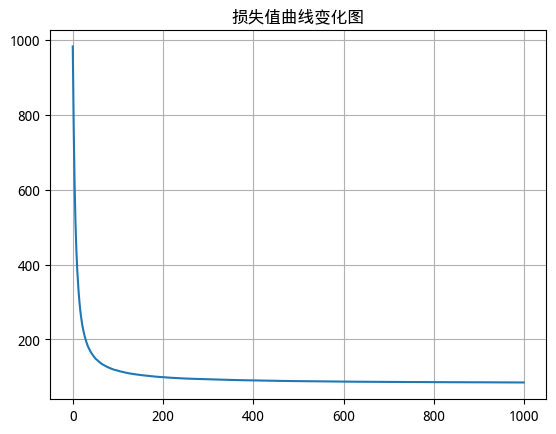

In [11]:
    #                 100轮         每轮的平均损失值
    plt.plot(range(epochs), loss_list)
    plt.title('损失值曲线变化图')
    plt.grid()      # 绘制网格线
    plt.show()

 # 9. 绘制预测值和真实值的关系.

/tmp/ipykernel_1803/4132541792.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_true = torch.tensor(data = [v * coef + 14.5 for v in x])


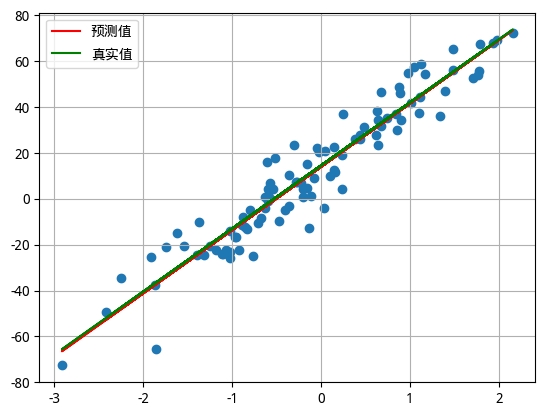

In [12]:
    # 9.1 绘制样本点分布情况.
    plt.scatter(x, y)
    # 9.2 绘制训练模型的预测值.
    # x: 100个样本点的特征.
    y_pred = torch.tensor(data = [v * model.weight + model.bias for v in x])
    # 9.3 计算真实值.
    y_true = torch.tensor(data = [v * coef + 14.5 for v in x])
    # 9.4 绘制预测值 和 真实值的 折线图.
    plt.plot(x, y_pred, color='red', label='预测值')
    plt.plot(x, y_true, color='green', label='真实值')
    # 9.5 图例, 网格.
    plt.legend()
    plt.grid()
    # 9.6 显示图像.
    plt.show()


    plt.show()